<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [ ]:
# Check for GPU
!nvidia-smi

Sat Apr 16 03:23:02 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [10]:
import requests
from pathlib import Path
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import pandas as pd
import torch
from torch import nn
from helper_functions import plot_predictions, plot_decision_boundary, accuracy_fn
from torchmetrics import Accuracy, ConfusionMatrix
import mlxtend
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm
from mlxtend.plotting import plot_confusion_matrix
import random
from pathlib import Path

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print (device)

2.3.0
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

1. Image recognition
2. Self Driving
3. Medical imaging

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [ ]:
fits training data well, but not genaralizable

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
1. dropout
2. stop training when test results are worse than training
3. introduce noixe

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

classifies graph as lady bug

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [14]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

## 6. Visualize at least 5 different samples of the MNIST training dataset.

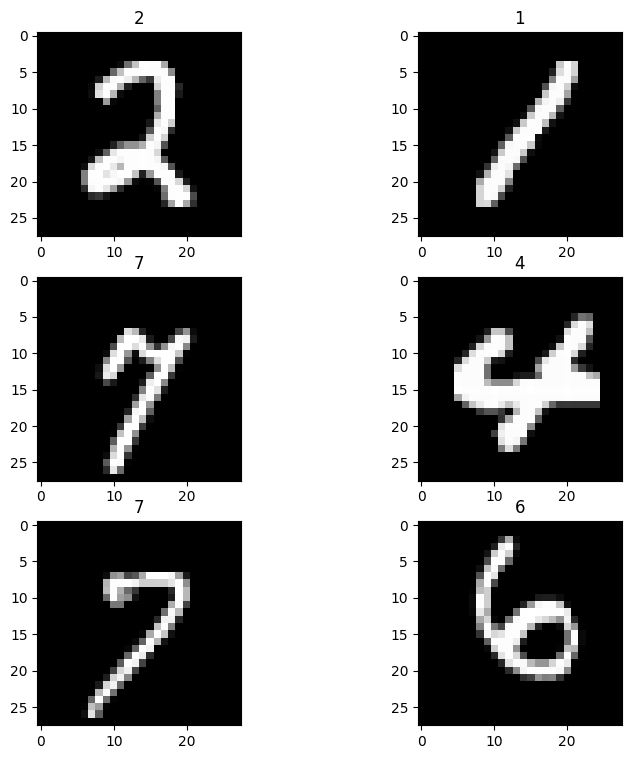

In [28]:
train_data_size = len (train_data)
fig = plt.figure (figsize=(9,9))
image_count_range = range (1, 7)
rows, cols = 3, 2
for i in  image_count_range:
    img_idx = random.randint(0, train_data_size)
    image, label = train_data[img_idx]
    fig.add_subplot (rows, cols, i)
    plt.imshow (image.squeeze(), cmap = 'grey')
    plt.title (label)




## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [29]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                            batch_size = BATCH_SIZE,
                            shuffle = True)

test_dataloader = DataLoader(dataset = test_data,
                            batch_size = BATCH_SIZE,
                            shuffle = False
                            )

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [64]:
# write test code to compute size of 
torch.manual_seed(42)
img, img_class = train_data[0]
img.shape
conv_layer = nn.Conv2d(in_channels = 1, 
                out_channels = 10,
                kernel_size = 3,
                padding = 0)
max_pool_layer = nn.MaxPool2d(kernel_size = 2)
flatten_model = nn.Flatten()
lazy_dense = nn.LazyLinear(out_features=10)


conv_out = conv_layer(img)
print( conv_out.view(1, -1).size(1))
maxp_out = max_pool_layer(conv_out)
print( maxp_out.view(1, -1).size(1))
flat_out = flatten_model(maxp_out)
final_out = lazy_dense(flat_out)
# flat_out.shape[0]*flat_out.shape[1]
final_out.shape

6760
1690


c:\Users\Tiger\anaconda3\envs\py311Udemy\Lib\site-packages\torch\nn\modules\lazy.py:181: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([10, 10])

In [ ]:
class HassanCNN(nn.Module):
    def __init__ (self,input_shape, hidden_units, output_shape,
            in_conv_k_size:int = 3,
            in_stride:int = 1,
            in_pad:int = 1,
            in_maxp_k_size = 2
            in_batch_size = 32):
        super().__init__()
        self.conv = nn.Conv2d(kernel_size=in_conv_k_size,
                            stride = in_stride,
                            padding = inpad)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=in_maxp_k_size)
        self.flatten = nn.Flatten()
        self.linear = nn.Linear()
        self.lazydense = nn.LazyLinear(output_feature = out_shape)

    def forward (self, x):
        # first block
        x = self.conv(x)
        x = self.relu(x)
        x = self.conv(x)
        x = self.maxpool(x)

        # second block
        x = self.conv(x)
        x = self.relu(x)
        x = self.conv(x, 
        # in_channels = hidden_units,
        #             out_channels = hidden_units)
        x = self.maxpool(x)

        # flatten
        # linear_output = x.size(1) * x.size(2) * hidden_units
        x = nn.flatten(x)
        # flattened_size = x.view(in_batch_size, -1).size(1)
        # flattened_features = hidden_units * flattened_size
        # flattened_feature = x.shape[0] * x.shape[1]
        x = nn.lazydense (x)
        return x





## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?